In [12]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [13]:
from pathlib import Path
import json

ds_tweets_save_path = "/srv/shared/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    # Updated-10-31-24: Note that we are not using this part due to Twitter now being a paid API service.
    rutgers_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(rutgers_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    rutgers_tweets = json.load(f)

### Print the first tweet 
pretty-print is a Python library function from the pprint module that is used to print complex data structures like dictionaries, lists, and nested lists or dictionaries in a readable and neatly formatted way. pretty print rutgers_tweets[0]. 

In [14]:
# Your code here
from pprint import pprint # ...to get a more easily-readable view.
pprint(rutgers_tweets[0])


{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   


Creating a list of tweets (**text only**) called tweets_list and Print the first 50 tweets to see the content covered in the tweets. 

In [15]:
# print the first 50 tweets (full_text only)
#Creating list to hold tweet texts
tweets_list = [
    re.sub(r'@\w+:', '', tweet['full_text']).replace('RT ', '').replace('&amp;', '&')
    for tweet in rutgers_tweets
]

#printing the first 50 tweets
for index, tweet in enumerate(tweets_list[:50], start=1):
    print(f"{index}: {tweet}")

1:  As the #internet turns 50, @RutgersCommInfo's @MaryChayko focuses on how we have used the innovation and what it has meant f…
2:  According to U.S. Rep. @FrankPallone, "continuous pharmaceutical manufacturing is the future of medicine." Now, new legislat…
3:  The 34th Annual Mary Philbrook Public Interest Award Celebration honored Lloyd Freeman RLAW'07 (@Esquire1911), Partner and…
4:  We will be holding our 4th Annual MLK Oratorical Competition in January 2020. You must write & recite an original speech c…
5: Happy first day of November! Can you believe we are already more than halfway through the semester? 🍂

📷: @curtiswebsterr on Instagram https://t.co/8tOBOjvVzl
6:  @EnergyCommerce @FrankPallone @ContinuousMFG @RutgersU To learn more about @FrankPallone's new pharmaceutical manufactu…
7: Daniel Hayden went back to school to pursue a physics degree and found a new home in the @RUMakerspace where he was able to deepen his love of music by building his own guitar. 

Read his story:

Finding the time range of **all the tweets** given in the RutgersU file. Print the answer in the format **Sat Nov 02 2019** to **Sun Jan 31 2020**

In [16]:
# your code
from datetime import datetime #Check if you are allowed to do this
#Initializing variables to store earliest and latest dates
early_date = None
late_date = None

#Looping through each tweet to find min & max dates
for tweet in rutgers_tweets:
    tweet_date = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')

    if early_date is None or tweet_date < early_date:
        early_date = tweet_date

    if late_date is None or tweet_date > late_date:
        late_date = tweet_date

formatted_startDate = early_date.strftime('%a %b %d %Y')
formatted_end = late_date.strftime('%a %b %d %Y')

#printing result
print(f"{formatted_startDate} to {formatted_end}")

Fri Oct 19 2018 to Sat Nov 02 2019


Each of the tweets contains twitter handles shown with @. Print a list of twitter handles and the frequency of usage for each. 
Extract all the handles using a **regex**. List the top 10 handles used by RutgersU

In [17]:
# your code
import re
from collections import Counter
#Initializing a list to hold the handles
handles_list = []

#Regex pattern to find the handles
pattern = r'@(\w+)'

#looping through each tweet to extract the handles
for tweet in rutgers_tweets:
    handles_found = re.findall(pattern, tweet['full_text'])
    handles_list.extend(handles_found)

#count variable for frequency of each handle
count_handles = Counter(handles_list)

#get the top 10 handles
top10 = count_handles.most_common(10)

#Printing
print("Top Twitter Handles and their Frequency:")
for handle, count_handles in top10:
    print(f"{handle}: {count_handles}")

Top Twitter Handles and their Frequency:
Rutgers_Camden: 272
RutgersU: 231
RutgersNB: 190
RutgersU_News: 179
RutgersLaw: 172
Rutgers_Newark: 171
RFootball: 163
RUAthletics: 156
rutgersalumni: 126
MasonGross: 116


There are two json files in the /srv/shared folder. realdonaldtrump_tweets_1.json and realdonaldtrump_tweets_2.json. Here is a function to help load the json tweet files.

In [18]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

#### Load the realdonaldtrump_tweets_1.json

In [19]:
dest_path = "/srv/shared/realdonaldtrump_tweets_1.json"
trump_tweets = load_tweets(dest_path)
#trump_tweets

In [20]:
trump_tweets_df = pd.DataFrame(trump_tweets)
trump_tweets_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,Tue Oct 16 16:22:11 +0000 2018,1052233253040640001,1052233253040640001,REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,False,"[0, 44]","{'hashtags': [{'text': 'MAGA', 'indices': [37, 42]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0pWiwCHGbh', 'expanded_url': 'http://Vote.GOP', 'display_url': 'Vote.GOP', 'indices': [12, 35]}, {'url': 'https://t.co/ACTMe53TZU', 'expanded_url': 'https:...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,"{'url': 'https://t.co/ACTMe53TZU', 'expanded': 'https://twitter.com/erictrump/status/1052174007708147714', 'display': 'twitter.com/erictrump/stat…'}","{'created_at': 'Tue Oct 16 12:26:46 +0000 2018', 'id': 1052174007708147714, 'id_str': '1052174007708147714', 'full_text': 'Friends: Quick reminder that today is that last day to register to vote in Oregon, Kansas, Louisiana, West Virginia, New Jersey and Maryland. It is very ...",5415,16565,False,False,False,en,NaN,NaN
1,Tue Oct 16 16:18:08 +0000 2018,1052232230972678145,1052232230972678145,RT @WhiteHouse: https://t.co/RNqLpOtS3O,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indic...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,4478,0,False,False,False,und,"{'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indices': [16, 39], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1052215563894763522/img/9FMSOYwUL-RDMGVT.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1052215563894763522...","{'created_at': 'Tue Oct 16 15:14:16 +0000 2018', 'id': 1052216160706420737, 'id_str': '1052216160706420737', 'full_text': 'https://t.co/RNqLpOtS3O', 'truncated': False, 'display_text_range': [0, 0], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], ..."
2,Tue Oct 16 15:26:33 +0000 2018,1052219253384994816,1052219253384994816,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",False,"[0, 264]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,13103,41253,False,False,NaN,en,NaN,NaN
3,Tue Oct 16 15:18:51 +0000 2018,1052217314463100928,1052217314463100928,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.052184e+18,1052184484941049857,...,NaN,NaN,6271,20251,False,False,NaN,en,NaN,NaN
4,Tue Oct 16 15:04:32 +0000 2018,1052213711295930368,1052213711295930368,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_men

#### Printing the earliest 10 tweets
Print the earliest tweets you can find from realdonaldtrump_tweets_1.json

In [21]:
# print the earliest 10 Trump tweets
from datetime import datetime
#converting to datetime format
trump_tweets_df['created_at'] = pd.to_datetime(trump_tweets_df['created_at'])

# Sort the DataFrame by the 'created_at' column
sorted_earliest = trump_tweets_df.sort_values(by='created_at')

# Select the earliest 10 tweets
earliest_tweets = sorted_earliest.head(10)
earliest_tweets

/tmp/ipykernel_2468978/731346949.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trump_tweets_df['created_at'] = pd.to_datetime(trump_tweets_df['created_at'])


,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
3213,2017-10-19 11:56:15+00:00,920981920787386368,920981920787386368,"Workers of firm involved with the discredited and Fake Dossier take the 5th. Who paid for it, Russia, the FBI or the Dems (or all)?",False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,24788,83417,False,False,NaN,en,NaN,NaN
3212,2017-10-19 12:21:18+00:00,920988223362469891,920988223362469891,".@foxandfriends ""Russia sent millions to Clinton Foundation""",False,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'foxandfriends', 'name': 'FOX & friends', 'id': 15513604, 'id_str': '15513604', 'indices': [1, 15]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,23219,69861,False,False,NaN,en,NaN,NaN
3211,2017-10-19 20:40:21+00:00,921113816053755904,921113816053755904,It was great to have Governor @RicardoRossello of #PuertoRico🇵🇷with us at the @WhiteHouse today. We are with you! #PRStrong https://t.co/Op2xDZxvNc,False,"[0, 123]","{'hashtags': [{'text': 'PuertoRico', 'indices': [50, 61]}, {'text': 'PRStrong', 'indices': [114, 123]}], 'symbols': [], 'user_mentions': [{'screen_name': 'ricardorossello', 'name': 'Ricardo Rossello', 'id': 80013913, 'id_str': '80013913', 'indices': [30, 46]}, {'screen_name':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,10158,47493,False,False,False,en,"{'media': [{'id': 921113597752807431, 'id_str': '921113597752807431', 'indices': [124, 147], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/921113597752807431/pu/img/QO4Yk0jtqndc4snd.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/921113597752807431/...",NaN
3210,2017-10-20 01:43:00+00:00,921189980843663360,921189980843663360,"Keep up the GREAT work. I am with you 100%!\n\n""ISIS is losing its grip...""\nArmy Colonel Ryan Dillon\nCJTF–OIR\nhttps://t.co/jVGuvv5mzm https://t.co/PSCXg38CtS",False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/jVGuvv5mzm', 'expanded_url': 'http://45.wh.gov/OIR', 'display_url': '45.wh.gov/OIR', 'indices': [108, 131]}], 'media': [{'id': 921178032366288897, 'id_str': '921178032366288897', 'indices': [1...","<a href=""https://studio.twitter.com"" rel=""nofollow"">Media Studio</a>",NaN,None,...,NaN,NaN,11882,52196,False,False,False,en,"{'media': [{'id': 921178032366288897, 'id_str': '921178032366288897', 'indices': [132, 155], 'media_url': 'http://pbs.twimg.com/media/DMizJLXW0AE6O2l.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DMizJLXW0AE6O2l.jpg', 'url': 'https://t.co/PSCXg38CtS', 'display_url': '...",NaN
3209,2017-10-20 02:53:42+00:00,921207772233990144,921207772233990144,"The Fake News is going crazy with wacky Congresswoman Wilson(D), who was SECRETLY on a very personal call, and gave a total lie on content!",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,NaN,19277,85920,False,False,NaN,en,NaN,NaN
3208,2017-10-20 03:00:42+00:00,921209530628956161,921209530628956161,Big ratings getter @seanhannity and Apprentice Champion John Rich are right now going on stage in Las Vegas for #VegasStrong. Great Show!,False,"[0, 137]","{'hashtags': [{'text': 'VegasStrong', 'indices': [112, 124]}], 'symbols': [], 'user_mentions': [{'screen_name': 'seanhannity', 'name': 'Sean Hannity', 'id': 41634520, 'id_str': '41634520', 'indices': [19, 31]}], 'urls': []}","<a href=""http://twi

Finding the number of the **month** of the oldest tweet. Find the number of the month of the oldest tweet (e.g. 1 for January)

In [22]:
### your code
from datetime import datetime
def oldest_tweet(df):
    
    # your solution here
    #extracting month from 'created_at'
    oldest_tweetDate = min(datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
                           for tweet in df)
    return oldest_tweetDate.month

oldest_month = oldest_tweet(trump_tweets)
print(oldest_month)

10


Merge the two dataframes created from **realdonaldtrump_tweets_1.json** and **realdonaldtrump_tweets_2.json**. Call this new dataframe **all_tweets** and print the head of the data frame.

In [23]:
### your code
import pandas as pd
dest_path1 = "/srv/shared/realdonaldtrump_tweets_1.json"
trump_tweets1 = load_tweets(dest_path1)

dest_path2 = "/srv/shared/realdonaldtrump_tweets_2.json"
trump_tweets2 = load_tweets(dest_path2)

dest_path3 = "/srv/shared/realdonaldtrump_tweets_3.json"
trump_tweets3 = load_tweets(dest_path3)

#reading the JSON files into DataFrames
tweets_1 = pd.DataFrame(trump_tweets1)
tweets_2 = pd.DataFrame(trump_tweets2)
tweets_3 = pd.DataFrame(trump_tweets3)

#renaming columns
tweets_1.rename(columns={'text': 'full_text'}, inplace=True)
tweets_2.rename(columns={'text': 'full_text'}, inplace=True)
tweets_3.rename(columns={'text': 'full_text'}, inplace=True)

#merging all DataFrames
all_tweets = pd.concat([tweets_1, tweets_2, tweets_3], ignore_index=True)
#Remove duplicates
all_tweets = all_tweets.drop_duplicates(subset=['id'], keep='first')
all_tweets['id'] = all_tweets['id'].astype(int)
all_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,is_retweet
0,Tue Oct 16 16:22:11 +0000 2018,1052233253040640001,1052233253040640001,REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,False,"[0, 44]","{'hashtags': [{'text': 'MAGA', 'indices': [37, 42]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0pWiwCHGbh', 'expanded_url': 'http://Vote.GOP', 'display_url': 'Vote.GOP', 'indices': [12, 35]}, {'url': 'https://t.co/ACTMe53TZU', 'expanded_url': 'https:...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,"{'created_at': 'Tue Oct 16 12:26:46 +0000 2018', 'id': 1052174007708147714, 'id_str': '1052174007708147714', 'full_text': 'Friends: Quick reminder that today is that last day to register to vote in Oregon, Kansas, Louisiana, West Virginia, New Jersey and Maryland. It is very ...",5415,16565,False,False,False,en,NaN,NaN,NaN
1,Tue Oct 16 16:18:08 +0000 2018,1052232230972678145,1052232230972678145,RT @WhiteHouse: https://t.co/RNqLpOtS3O,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indic...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,4478,0,False,False,False,und,"{'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indices': [16, 39], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1052215563894763522/img/9FMSOYwUL-RDMGVT.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1052215563894763522...","{'created_at': 'Tue Oct 16 15:14:16 +0000 2018', 'id': 1052216160706420737, 'id_str': '1052216160706420737', 'full_text': 'https://t.co/RNqLpOtS3O', 'truncated': False, 'display_text_range': [0, 0], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], ...",NaN
2,Tue Oct 16 15:26:33 +0000 2018,1052219253384994816,1052219253384994816,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",False,"[0, 264]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,NaN,13103,41253,False,False,NaN,en,NaN,NaN,NaN
3,Tue Oct 16 15:18:51 +0000 2018,1052217314463100928,1052217314463100928,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.052184e+18,1052184484941049857,...,NaN,6271,20251,False,False,NaN,en,NaN,NaN,NaN
4,Tue Oct 16 15:04:32 +0000 2018,1052213711295930368,1052213711295930368,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FoxNews', 'name': 'Fox News', 'id': 1367531, 'id_str': '1367531', 'indices': [102, 110]}], 'urls': []}","<a href=""http://twitter.com/

Construct a DataFrame (with specific columns) scalled **`df_trump`** from all the tweets stored in `all_tweets`. 

The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). df_trump columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text` or 'full_text': The text of the tweet.
- `retweet_count`: The retweet count of the tweet.
- `favorite_count`: The favorite count of the tweet.

In [24]:
# merged dataframe sorted by date/time (earliet tweet first)
### your code
#Creating new DataFrame with select columns
df_trump = all_tweets.copy()

#Dropping duplicates based on tweet ID
df_trump.drop_duplicates(subset='id', inplace=True)

#Renaming columns for consistency
df_trump.rename(columns={'full_text': 'text'}, inplace=True)
df_trump['time'] = pd.to_datetime(df_trump['created_at'], errors='coerce')
df_trump.set_index('id', inplace=True)

#Selecting required columns
df_trump = df_trump[['time', 'source', 'text', 'retweet_count', 'favorite_count']]

#Sorting by earliest time
df_trump.sort_values(by='time', inplace=True)

###
df_trump

/tmp/ipykernel_2468978/1172614325.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_trump['time'] = pd.to_datetime(df_trump['created_at'], errors='coerce')


,time,source,text,retweet_count,favorite_count
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490
...,...,...,...,...,...
1101856883634302976,2019-03-02 14:48:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @realDonaldTrump: Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)…,24511,0
1101857408001949696,2019-03-02 14:50:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @realDonaldTrump: I hope our great Republican Senators don’t get led down the path of weak and ineffective Border Security. Without stro…,27707,0
1101857665037287425,2019-03-02 14:51:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…,34498,0


### Characteristics of Trump Tweets

In [25]:
### your code
uniqueDevices = df_trump['source'].unique()

#displaying unique devices
uniqueDevices

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

### Removing the HTML tags

In [26]:
import re
### your code
#removing HTML tags from 'source' column
df_trump['source'] = df_trump['source'].str.replace(r'<.*?>', '', regex=True)

#displaying updated DataFrame
df_trump

,time,source,text,retweet_count,favorite_count
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490
...,...,...,...,...,...
1101856883634302976,2019-03-02 14:48:47+00:00,Twitter for iPhone,RT @realDonaldTrump: Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)…,24511,0
1101857408001949696,2019-03-02 14:50:52+00:00,Twitter for iPhone,RT @realDonaldTrump: I hope our great Republican Senators don’t get led down the path of weak and ineffective Border Security. Without stro…,27707,0
1101857665037287425,2019-03-02 14:51:53+00:00,Twitter for iPhone,RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…,34498,0


#### What is the most common device used for Trump tweets? 
Plot to find out the most common device types used 

In [ ]:
### your code
#counts for occurrences of each device in 'source' column
deviceCounts = df_trump['source'].value_counts()

#Sorting counts in descending order
countsSorted = deviceCounts.sort_values(ascending=False)

#Bar plot
plt.figure(figsize=(10, 6))
countsSorted.plot(kind='bar', color='darkblue')
plt.title('Number of Times Device Type was used to Tweet')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Comparing Devices
Is there a difference between his Tweet behavior across these devices?

Taking a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone.

In [28]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

Converting the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [29]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,favorite_count,est_time
id,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490,2016-01-01 01:08:06-05:00




Adding a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [30]:
## your code
df_trump['hour'] = df_trump['est_time'].dt.hour + (df_trump['est_time'].dt.minute / 60) + (df_trump['est_time'].dt.second / 3600) # Write your code here
# a new column that contains the rounded hour
df_trump['roundhour']=round(df_trump['hour'])
df_trump.head()

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour
id,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143,2016-01-01 00:18:23-05:00,0.306389,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0


Using the `roundhour` column and plot the number of tweets at every hour of the day.
Ordering the plot using the hour of the day (1 to 24). Using seaborn `countplot`

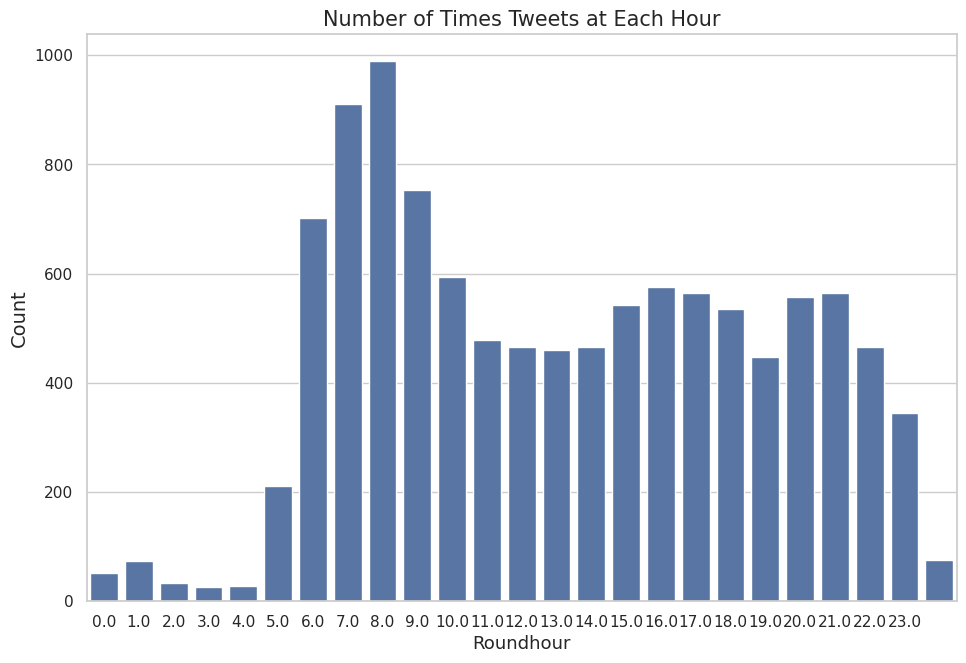

In [31]:
# make a bar plot here
### your code

#setting style of plot
sns.set(style="whitegrid")

#creating countplot
plt.figure(figsize=(10,7))
sns.countplot(data=df_trump, x='roundhour', order=sorted(df_trump['roundhour'].unique()))

#titles & labels
plt.title('Number of Times Tweets at Each Hour', fontsize=15)
plt.xlabel('Roundhour', fontsize=13)
plt.ylabel('Count', fontsize=14)

#plot
plt.xticks(range(0, 24))
plt.show()

In [ ]:
### Your code
# 2 most commonly used devices
commonDevices = df_trump['source'].value_counts().index[:2]

#filtering df for top devices
filteredDf = df_trump[df_trump['source'].isin(commonDevices)]

#setting style of plot
#sns.set(style="whitegrid")

#Dist plot
plt.figure(figsize=(12,6))

for device in commonDevices:
    sns.distplot(filteredDf[filteredDf['source'] == device]['hour'], hist=False, kde=True, label=device, kde_kws={'linewidth': 2})
    
plt.title('Distribution of Tweets on iPhone and Android over the span of a day', fontsize=15)
plt.xlabel('Hour (Eastern Time)', fontsize=14)
plt.ylabel('Fraction', fontsize=14)
plt.xlim(0,25)
plt.xticks(range(0, 25,2))
plt.legend(title='Source')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
### 

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


In [ ]:
### your code
#filtering tweets from 2016
filtered_2016 = filteredDf[filteredDf['est_time'].dt.year == 2016]

#Dist plot
plt.figure(figsize=(12,6))

for device in commonDevices:
    sns.distplot(filtered_2016[filtered_2016['source'] == device]['hour'], hist=False, kde=True, label=device, kde_kws={'linewidth': 2})
    
plt.title('Distribution of Tweets in 2016 on iPhone and Android over the span of a day', fontsize=15)
plt.xlabel('Hour (Eastern Time)', fontsize=14)
plt.ylabel('Fraction', fontsize=14)
plt.xlim(0,25)
plt.xticks(range(0, 25,5))
plt.legend(title='Source')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    

### 

The Android tweets were made during early morning and late night hours. 
The iPhone tweets were made during regular working hours, ranging from 9am to 6pm.

### Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates  --> convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [34]:
from datetime import datetime as dt
import time
## your code
def sinceEpoch(date):
        return time.mktime(date.timetuple())
    
def year_fraction(date):

    s_value = sinceEpoch
    year = date.year
    startYr = dt(year=year, month=1, day=1)
    startNxtYr = dt(year=year +1, month=1, day=1)
    year_passed = s_value(date) - s_value(startYr)
    year_duration = s_value(startNxtYr) - s_value(startYr)
    fraction = year_passed/year_duration
    return date.year + fraction

###
df_trump['year'] = df_trump['time'].apply(year_fraction)

df_trump

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year
id,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.000084
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.000390
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143,2016-01-01 00:18:23-05:00,0.306389,0.0,2016.000604
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000697
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.000698
...,...,...,...,...,...,...,...,...,...
1101856883634302976,2019-03-02 14:48:47+00:00,Twitter for iPhone,RT @realDonaldTrump: Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)…,24511,0,2019-03-02 09:48:47-05:00,9.813056,10.0,2019.166075
1101857408001949696,2019-03-02 14:50:52+00:00,Twitter for iPhone,RT @realDonaldTrump: I hope our great Republican Senators don’t get led down the path of weak and ineffective Border Security. Without stro…,27707,0,2019-03-02 09:50:52-05:00,9.847778,10.0,2019.166079
1101857665037287425,2019-03-02 14:51:53+00:00,Twitter for iPhone,RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…,34498,0,2019-03-02 09:51:53-05:00,9.864722,10.0,2019.166080


Using the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years. 

In [ ]:
### your code
# 2 most commonly used devices
commonDevices_2 = df_trump['source'].value_counts().index[:2]

#filtering df for top devices
filteredDf_2 = df_trump[df_trump['source'].isin(commonDevices)]

plt.figure(figsize=(10,6))

for device in filteredDf_2['source'].unique():
    sns.distplot(filteredDf_2[filteredDf_2['source'] == device]['year'], hist=True, kde=True, label=device, bins=20,
                 kde_kws={"linewidth": 2}, hist_kws={"alpha": 0.4})

plt.xlabel("year", fontsize=14)
plt.legend(title="Source", fontsize=12, loc="upper left")
plt.show()


## Sentiment Analysis 

Using the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [36]:
print(''.join(open("/srv/shared/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



Using this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

In [37]:
### your code
df_trump['text']=df_trump['text'].str.lower()
#Lexicon df
lexiconPath = "/srv/shared/vader_lexicon.txt"

#Load lexicon into df
df_sent = pd.read_csv(lexiconPath, sep='\t', header=None, names=['tokens', 'polarity', 'standard_deviation', 'sentiment_scores'])
df_sent.set_index('tokens', inplace=True)
df_sent.drop(columns=['standard_deviation', 'sentiment_scores'], inplace=True)

df_sent


,polarity
tokens,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


Creating a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space.


In [38]:
import re
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'

### your code
#function to remove punctuation from tweet text
def remove_punc(tweet):
    #replacing punctuation with space using above defined regex
    return re.sub(punct_re, ' ', tweet).lower()

#creating column 'no_punc'
df_trump['no_punc'] = df_trump['text'].apply(remove_punc)
df_trump
### 

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc
id,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.000084,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.000390,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,9143,2016-01-01 00:18:23-05:00,0.306389,0.0,2016.000604,happynewyearamerica https t co eeqb8pdrue
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000697,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.000698,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus
...,...,...,...,...,...,...,...,...,...,...
1101856883634302976,2019-03-02 14:48:47+00:00,Twitter for iPhone,rt @realdonaldtrump: since my election as president the dow jones is up 43% and the nasdaq composite almost 50%. great news for your 401(k)…,24511,0,2019-03-02 09:48:47-05:00,9.813056,10.0,2019.166075,rt realdonaldtrump since my election as president the dow jones is up 43 and the nasdaq composite almost 50 great news for your 401 k
1101857408001949696,2019-03-02 14:50:52+00:00,Twitter for iPhone,rt @realdonaldtrump: i hope our great republican senators don’t get led down the path of weak and ineffective border security. without stro…,27707,0,2019-03-02 09:50:52-05:00,9.847778,10.0,2019.166079,rt realdonaldtrump i hope our great republican senators don t get led down the path of weak and ineffective border security without stro
1101857665037287425,2019-03-02 14:51:53+00:00,Twitter for iPhone,rt @realdonaldtrump: 93% approval rating in the republican party. 52% approval rating overall! not bad considering i get the most unfair (b…,34498,0,2019-03-02 09:51:53-05:00,9.864722,10.0,2019.166080,rt realdonaldtrump 93 approval rating in the republican party 52 approval rating overall not bad considering i get the most unfair b


### asserts
test the assert statements below.

In [39]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[1052233253040640001] == 'register to https   t co 0pwiwchgbh   maga   https   t co actme53tzu'
assert df_trump['text'].loc[1052217314463100928] == '“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?'

Converting the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

In [40]:
#tidy_format = (df_trump['no_punc'].str.split(expand=True).stack().reset_index(level=1, drop=True).reset_index().rename(columns={0: 'word'}))

### your code
#splitting tweets into words
wordsDf = df_trump['no_punc'].str.split(expand=True)

#stacking DataFrame to get long format
stack = wordsDf.stack()

#resetting index to convert multi-level index into columns
tidy_format = stack.reset_index()

#renaming columns
tidy_format.columns = ['id', 'num', 'word']

#setting index to tweet IDs
tidy_format.set_index('id', inplace=True)

tidy_format
### 

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews
...,...,...
1101880269106221058,2,marklevinshow
1101880269106221058,3,https
1101880269106221058,4,t


In [41]:
assert tidy_format.loc[1052217314463100928].shape == (45, 2)
assert ' '.join(list(tidy_format.loc[1052217314463100928]['word'])) == 'conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions'

Adding a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.


In [42]:
### your code
##WRONG OUTPUT

#merging df_sent to get polarity of each word
merged_df = tidy_format.merge(df_sent, how='left', left_on='word', right_index=True)
#group by tweet id and sum up polarity
#df_trump_polarity = (merge_df.groupby("id", as_index=False).agg({"polarity":"sum"}).rename(columns={"polarity": "tweet_polarity"}))
grouped_df = merged_df.groupby(merged_df.index).agg({'polarity': 'sum'})

#adding polarity column into df_trump
df_trump['polarity'] = grouped_df
df_trump
#merge_df




,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.000084,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.000390,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,9143,2016-01-01 00:18:23-05:00,0.306389,0.0,2016.000604,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000697,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.000698,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
...,...,...,...,...,...,...,...,...,...,...,...
1101856883634302976,2019-03-02 14:48:47+00:00,Twitter for iPhone,rt @realdonaldtrump: since my election as president the dow jones is up 43% and the nasdaq composite almost 50%. great news for your 401(k)…,24511,0,2019-03-02 09:48:47-05:00,9.813056,10.0,2019.166075,rt realdonaldtrump since my election as president the dow jones is up 43 and the nasdaq composite almost 50 great news for your 401 k,3.1
1101857408001949696,2019-03-02 14:50:52+00:00,Twitter for iPhone,rt @realdonaldtrump: i hope our great republican senators don’t get led down the path of weak and ineffective border security. without stro…,27707,0,2019-03-02 09:50:52-05:00,9.847778,10.0,2019.166079,rt realdonaldtrump i hope our great republican senators don t get led down the path of weak and ineffective border security without stro,4.0
1101857665037287425,2019-03-02 14:51:53+00:00,Twitter for iPhone,rt @realdonaldtrump: 93% approval rating in the republican party. 52% approval rating overall! not bad considering i get the most unfair (b…,34498,0,2019-03-02 09:51:53-05:00,9.864722,10.0,2019.166080,rt realdonaldtrump 93 approval rating in the republican party 52 approval rating overall not bad considering i get the most unfair b,1.3


In [43]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


Measuring of the sentiment of each of his tweets!
The 20 most positive and most 20 negative tweets from Trump in dataset:

In [44]:
print('Most negative tweets:')

### your code
pos_tweets = df_trump.sort_values(by='polarity', ascending=True).head(20)

for i, row in enumerate(pos_tweets.itertuples(), start=1):
    print(f"{i}: {row.text}")
### 

Most negative tweets:
1: the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....
2: it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!
3: the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!
4: ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of anti-s

In [45]:
print('Most positive tweets:')

### your code
neg_tweets = df_trump.sort_values(by='polarity', ascending=False).head(20)
#neg_tweets

for i, row in enumerate(neg_tweets.itertuples(), start=1):
    print(f"{i}: {row.text}")
### 

Most positive tweets:
1: congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!
2: congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.
3: my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!
4: thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new pol


Distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`. 

In [ ]:
### your code
#adding column classifying tweets based on 'nyt' or 'fox'
df_trump['source_key'] = df_trump['text'].apply(lambda x: 'nyt' if 'nyt' in x.lower() else ('fox' if 'fox' in x.lower() else 'other'))

#filtering 'nyt' or 'fox' tweets
filtered_df_key = df_trump[df_trump['source_key'].isin(['nyt','fox'])]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df_key, x='polarity', hue='source_key', kde=True, stat="density", common_norm=False)
plt.title('Distribution of Tweet Sentiments by Source Keyword (NYT vs FOX)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.legend(title='Source', labels=['NYT', 'FOX'])
plt.show()


### 

## Twitter Engagement

### Retweets
Top 20 most **retweeted words**. Including only words that appear in at least 25 tweets.

In [47]:
from nltk.corpus import stopwords
import pandas as pd
#making sure nltk is available
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/as3929/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df_trump['word'] = df_trump['text'].str.lower().apply(
    lambda x: re.findall(r'\b\w+\b', x)
    )
df_trump = df_trump.explode('word')

#filtering out common words
df_trump = df_trump.loc[~df_trump['word'].isin(stop_words)]

top_20 = (
    df_trump
    .groupby('word')
    .agg(
        retweet_count=('retweet_count', 'sum'),
        tweet_count=('word', 'count') 
    )
    .query('tweet_count >= 25') 
    .assign(avg_retweets=lambda x: x['retweet_count'] / x['tweet_count'])
    .sort_values(by='avg_retweets', ascending=False)
    .head(20) 
)

top_20 = top_20[['avg_retweets']].rename(columns={'avg_retweets': 'retweet_count'})
top_20

,retweet_count
word,
jong,33497.955556
christmas,31481.269231
maybe,29861.093750
kavanaugh,29274.392857
mccabe,29247.866667
un,29086.160714
old,28794.926829
kim,28324.633803
illegally,28272.957447


### Plot Top Retweets
Plotting a bar chart of your results from 5.1:

In [ ]:
### your code
plt.figure(figsize=(12, 7))
top_20['retweet_count'].plot(kind='bar', color='darkblue')
plt.title("Top 20 Most Retweeted Words", fontsize=16)
plt.ylabel("retweet_count", fontsize=15)
plt.xlabel("words", fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### Favorites
Finding the top 20 most favorite tweets and their sentiments.

In [50]:
## your code 
df_trump_unique = df_trump.drop_duplicates(subset='text')
top_20_fav = df_trump_unique.nlargest(20, 'favorite_count')
top_20_fav['sentiment'] = top_20_fav['polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
top_20_fav = top_20_fav[['text', 'sentiment']]
top_20_fav



,text,sentiment
id,,
796315640307060738,such a beautiful and important evening! the forgotten man and woman will never be forgotten again. we will all come together as never before,Positive
881503147168071680,#fraudnewscnn #fnn https://t.co/wyunhjjujg,Negative
929511061954297857,"why would kim jong-un insult me by calling me ""old,"" when i would never call him ""short and fat?"" oh well, i try so hard to be his friend - and maybe someday that will happen!",Positive
795954831718498305,today we make america great again!,Positive
1077549301449060352,merry christmas!,Positive
948355557022420992,"north korean leader kim jong un just stated that the “nuclear button is on his desk at all times.” will someone from his depleted and food starved regime please inform him that i too have a nuclear button, but it is a much bigger &amp; more powerful one than his, and my butto...",Positive
823174199036542980,"peaceful protests are a hallmark of our democracy. even if i don't always agree, i recognize the rights of people to express their views.",Positive
989225812166696960,"thank you kanye, very cool! https://t.co/vric87m21x",Positive
815185071317676033,"happy new year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. love!",Negative


### Plot sentiment of the top Favorite Tweets
Plotting a bar chart of your results from 5.3:

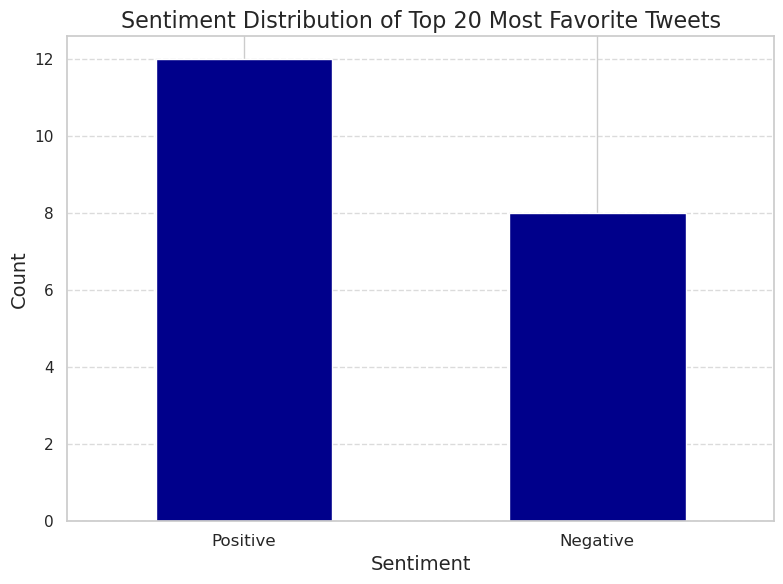

In [51]:
### your code
count_sentiment = top_20_fav['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
count_sentiment.plot(kind='bar', color='darkblue')
plt.title("Sentiment Distribution of Top 20 Most Favorite Tweets", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
